# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
#!pip install folium

In [1]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter('ignore')


## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
df.drop(columns = 'dropoff_datetime', inplace = True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

''

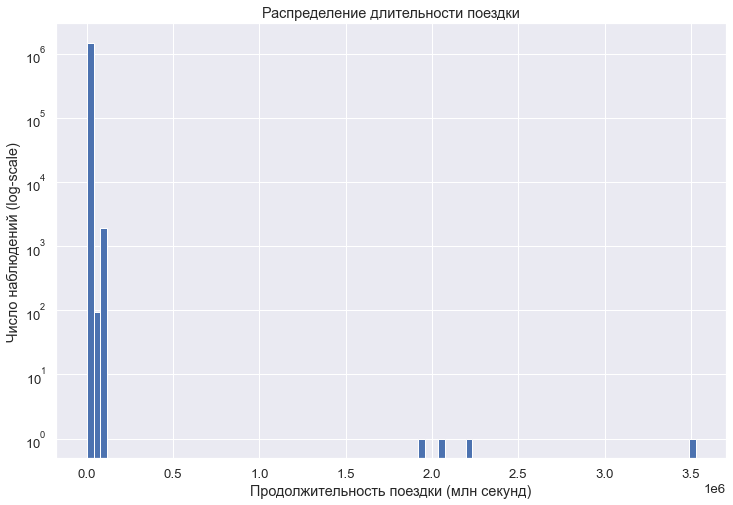

In [6]:
plt.figure(figsize = (12, 8))
sns.set(font_scale = 1.2)

plt.hist(df['trip_duration'], bins = 90)
plt.yscale('log')
plt.title('Распределение длительности поездки')
plt.xlabel('Продолжительность поездки (млн секунд)')
plt.ylabel('Число наблюдений (log-scale)')
;

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Мы видим, что бОльшая часть значений сконцентрирована в диапазоне  примерно от 0 до 0.1. Учитывая, что шкала по иксу измеряется в миллионах, то в основном длительность поездки составляла от чего-то близкого к нулю до 100000. Однако в данных также есть выбросы (на графике видно четыре штуки) - три в районе 2 млн и еще один около 3.5 млн

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Как нам рассказали на лекции, метрики MSLE или RMSLE могут использоваться тогда, когда мы не хотим сильно штрафовать модель за ошибки внутри одного порядка (например предсказание 700, когда правильное значение 500), но хотим штрафовать ее за сильные отклонения на порядок или больше (например, предсказание 10000, когда реальное значение 1500). Именно эту функцию берет на себя логарифм в данной метрике. 

В нашей задаче есть сильный разброс в данных (есть поездки которые длились несколько сотен секунд, а также есть часовые поездки и т.д.), также есть и выбросы. И к тому же, с точки зрения предсказания длительности поездки нам как раз не страшно ошибиться внутри одного порядка, а более важное значение нужно придать сильным отклонениям. Я думаю поэтому авторы выбрали RMSLE.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Мы знаем, что $\hat{y}_i = \log{(y_i + 1)}$. Также из условия $a(x_i) = \exp(\hat{a}(x_i)) - 1$ можно найти, что: $\hat{a}(x_i) = \log(a(x_i) + 1)$

Тогда мы получим, что:
$$\text{RMSE}(X, \hat{y}, \hat{a}) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y_i} - \hat{a(x_i)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \text{RMSLE}(X, y, a)$$

То есть мы поняли, что оптимизация RMSLE - это то же самое, что оптимизация RMSE для отлогарифмированного таргета. А RMSE в свою очередь это просто монотонное преобразование (корень) для MSE, поэтому оптимизация MSE будет эквивалентна оптимизации RMSE. [Разница](https://loginom.ru/blog/quality-metrics) между ними будет разве что в скорости сходимости градиентным спуском к минимуму.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [7]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df.drop(columns = 'trip_duration', inplace = True)

''

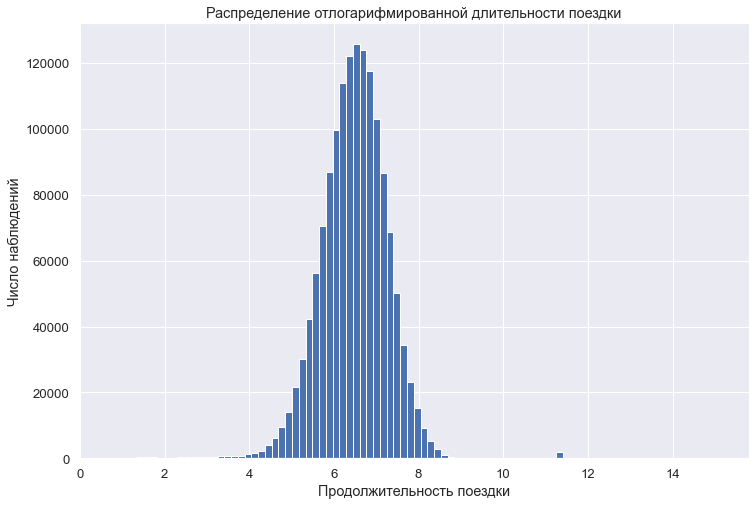

In [8]:
plt.figure(figsize = (12, 8))
sns.set(font_scale = 1.2)

plt.hist(df['log_trip_duration'], bins = 90)
plt.title('Распределение отлогарифмированной длительности поездки')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Число наблюдений')
;

Полезное свойство логарифма - то, что он сглаживает распределение, теперь оно похоже на нормальное, и нет таких явных выбросов

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

Насколько я помню, если подставить в качестве прогноза константу и решить задачу минимизации, то оценка для этой константы - это среднее

In [9]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(((log1p_y_pred - log1p_y_true) ** 2).mean())

mn = df['log_trip_duration'].mean()
rmsle_best_const = rmsle(df['log_trip_duration'], np.ones(len(df)) * mn)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365412156


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

''

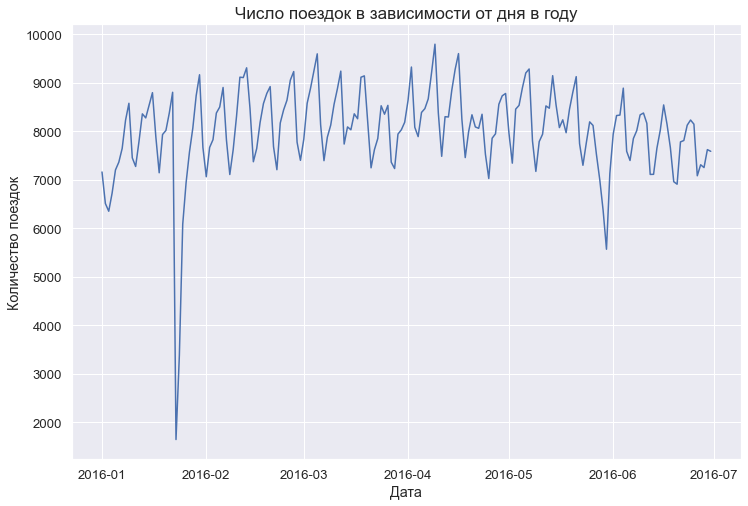

In [10]:
# создаем небольшой датафрейм с датами и числом поездок
trip_count = pd.DataFrame(df['pickup_datetime'].dt.date.value_counts()).sort_index()

plt.figure(figsize = (12, 8))
plt.title('Число поездок в зависимости от дня в году', fontsize = 17)
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.plot(trip_count.index, trip_count['pickup_datetime'])
;

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [11]:
trip_count.sort_values('pickup_datetime', ascending = True).head(3)

,pickup_datetime
2016-01-23,1648
2016-01-24,3383
2016-05-30,5570


Как мы видели из графика было две даты в которые число поездок сильно обвалилось. Как оказалось, одна из них - это 23 января 2016г. На следующий день (24 января) число поездок немного выросло, но тоже было маленькое. Вторая дата - это 30 мая 2016г.

[Оказывается](https://en.wikipedia.org/wiki/January_2016_United_States_blizzard), 23-24 января на Нью-Йорк обрушился сильный снегопад

Про 30 мая 2016г. не так много информации, но в этот день в США отмечается [день памяти](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D0%BD%D1%8C_%D0%BF%D0%BE%D0%BC%D0%B8%D0%BD%D0%BE%D0%B2%D0%B5%D0%BD%D0%B8%D1%8F_(%D0%A1%D0%A8%D0%90)), может быть из-за этого дороги были перекрыты

''

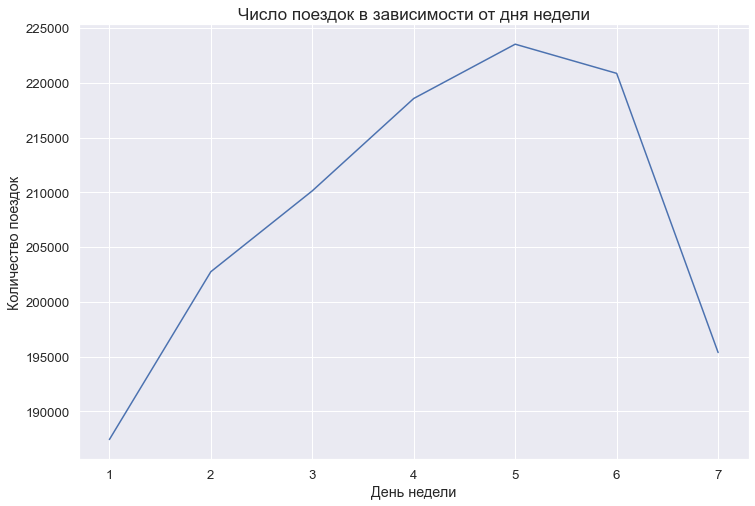

In [12]:
# график для дня недели
trip_count_day = pd.DataFrame(df['pickup_datetime'].dt.isocalendar().day.value_counts()).sort_index()

plt.figure(figsize = (12, 8))
plt.title('Число поездок в зависимости от дня недели', fontsize = 17)
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.plot(trip_count_day.index, trip_count_day['day'])
;

''

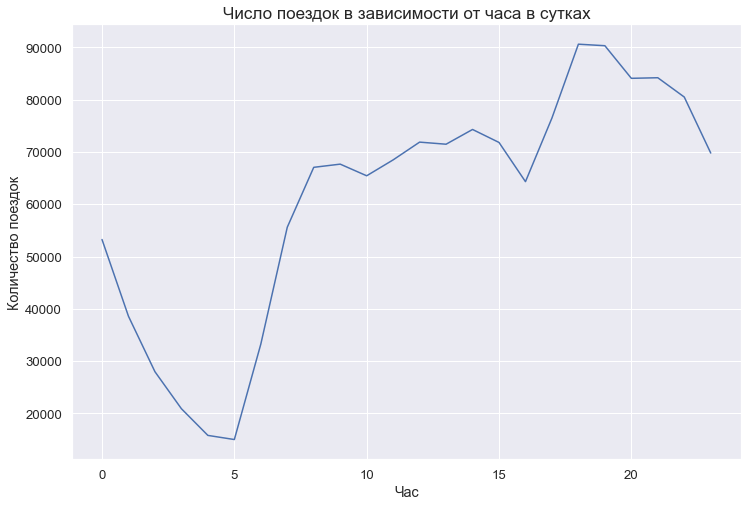

In [13]:
# график для часов в сутках
trip_count_hour = pd.DataFrame(df['pickup_datetime'].dt.hour.value_counts()).sort_index()

plt.figure(figsize = (12, 8))
plt.title('Число поездок в зависимости от часа в сутках', fontsize = 17)
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.plot(trip_count_hour.index, trip_count_hour['pickup_datetime'])
;

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

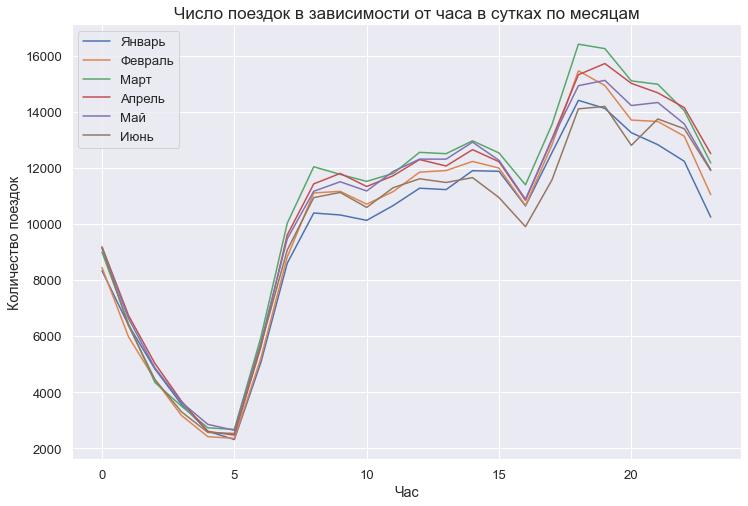

In [14]:
# график для разных месяцев
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь']
plt.figure(figsize = (12, 8))
plt.title('Число поездок в зависимости от часа в сутках по месяцам', fontsize = 17)
plt.xlabel('Час')
plt.ylabel('Количество поездок')
for el in np.arange(1, 7):
    trip_count_hour = pd.DataFrame(df[df['pickup_datetime'].dt.month ==
                                      el]['pickup_datetime'].dt.hour.value_counts()).sort_index()
    plt.plot(trip_count_hour.index, trip_count_hour['pickup_datetime'], label = months[el - 1])
                                                                        # вычитаем 1 т.к. мы начинали с 1 в цикле
plt.legend(); 
    



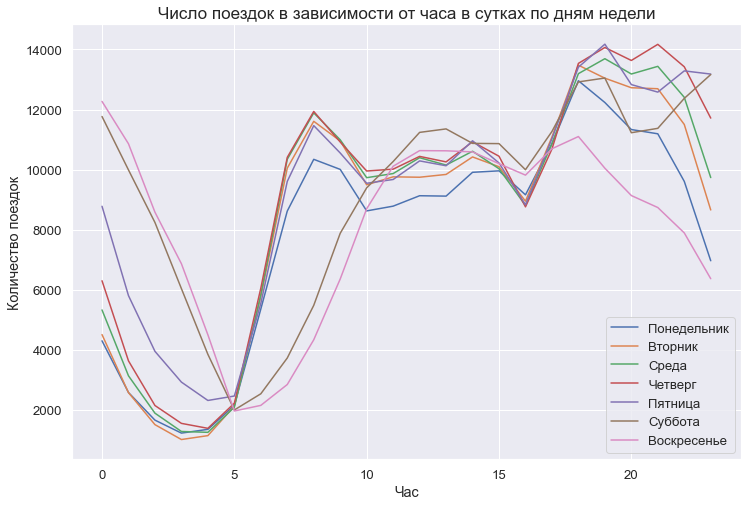

In [15]:
# график для разных дней недели
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
plt.figure(figsize = (12, 8))
plt.title('Число поездок в зависимости от часа в сутках по дням недели', fontsize = 17)
plt.xlabel('Час')
plt.ylabel('Количество поездок')
for el in np.arange(1, 8):
    trip_count_hour = pd.DataFrame(df[df['pickup_datetime'].dt.isocalendar().day ==
                                      el]['pickup_datetime'].dt.hour.value_counts()).sort_index()
    plt.plot(trip_count_hour.index, trip_count_hour['pickup_datetime'], label = days[el - 1])
                                                                        # вычитаем 1 т.к. мы начинали с 1 в цикле
plt.legend(); 

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

В целом распределение поездок по часам имеет везде схожий характер: число поездок убывает с полуночи до 4-5 утра, а затем возрастает до вечера и где-то после 7-8 вечера идет на спад. Очевидно, это связано с тем, что ночью люди спят, утром им надо на работу, в течение дня может быть надо куда-то по делам, а после рабочего дня, в основном, они едут домой и число поездок после этого падает.

Поэтому для разных месяцев распределение получилось довольно похожее, здесь нельзя выделить что-то особенное.

А вот при разбиении по дням недели выделяются суббота и воскресенье: здесь побольше заказов ночью (от полуночи до 5 утра) чем в остальные дни и поменьше заказов утром (когда все едут на работу в другие дни) и вечером (когда все едут с работы в другие дни). То есть люди отдыхают :)

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state = 5)

Потом я еще много раз буду разбивать на train и test с тем же random state просто потому, что преобразования удобнее сделать на всем датасете а потом снова разбить его

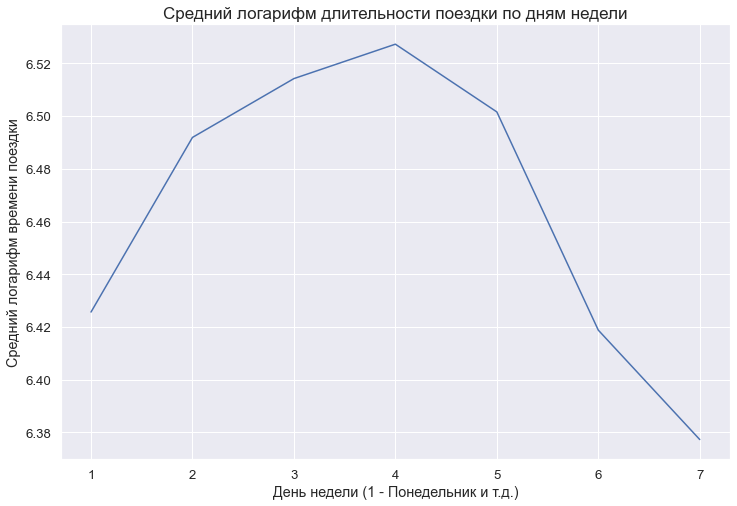

In [17]:
# делаем датасет из groupby, где есть средний логарифм времени для каждого дня недели
mean_day = pd.DataFrame(train.groupby(train['pickup_datetime'].dt.isocalendar().day)['log_trip_duration'].mean())

plt.figure(figsize = (12, 8))
plt.title('Средний логарифм длительности поездки по дням недели', fontsize = 17)
plt.xlabel('День недели (1 - Понедельник и т.д.)')
plt.ylabel('Средний логарифм времени поездки')
plt.plot(mean_day.index, mean_day['log_trip_duration']);

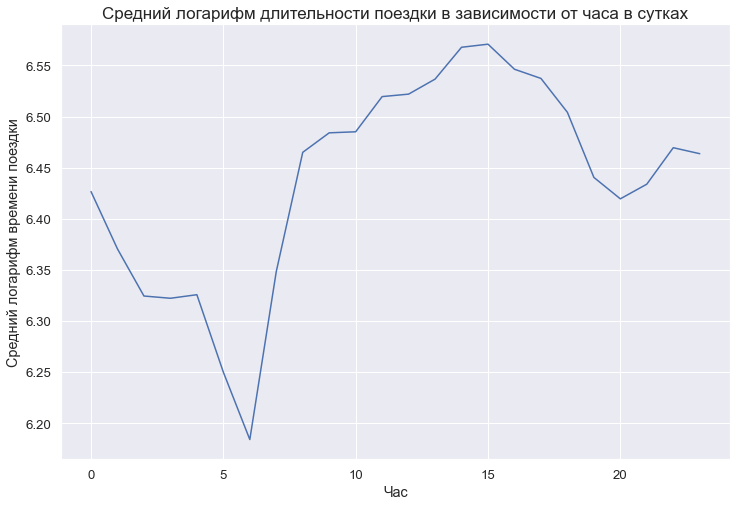

In [18]:
# то же самое для часа в сутках
mean_hour = pd.DataFrame(train.groupby(train['pickup_datetime'].dt.hour)['log_trip_duration'].mean())

plt.figure(figsize = (12, 8))
plt.title('Средний логарифм длительности поездки в зависимости от часа в сутках', fontsize = 17)
plt.xlabel('Час')
plt.ylabel('Средний логарифм времени поездки')
plt.plot(mean_hour.index, mean_hour['log_trip_duration']);

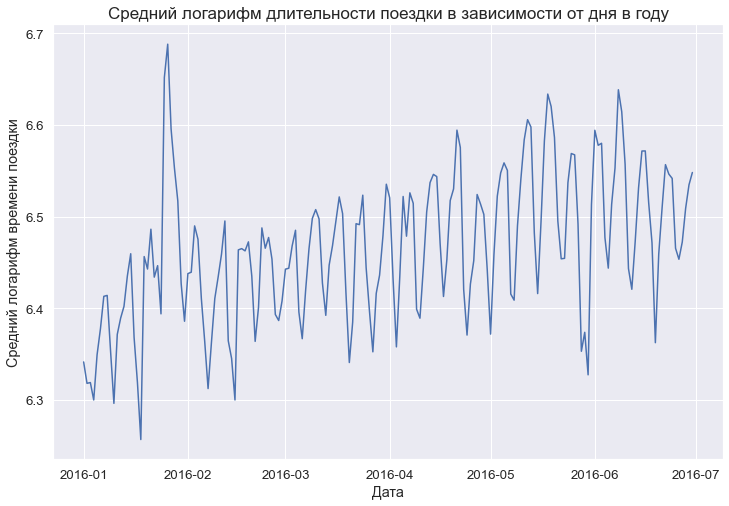

In [19]:
# теперь для дня в году
mean_date = pd.DataFrame(train.groupby(train['pickup_datetime'].dt.date)['log_trip_duration'].mean())

plt.figure(figsize = (12, 8))
plt.title('Средний логарифм длительности поездки в зависимости от дня в году', fontsize = 17)
plt.xlabel('Дата')
plt.ylabel('Средний логарифм времени поездки')
plt.plot(mean_date.index, mean_date['log_trip_duration']);

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

В целом все графики схожи по форме, но есть определенные различия в деталях. Сначала сравним графики по дням недели: и средний логарифм продолжительности поездки, и кол-во поездок возрастают до четверга, но продолжительность убывает сразу после, а число поездок растет до пятницы и только потом убывает. Это может быть связано с тем, что в пятницу люди возвращаются уже не домой, а едут куда-нибудь отдыхать поблизости (к друзьям, родственникам и т.д.), а в выходные поток машин уже не такой большой и можно быстрее вернуться домой. Поэтому количество поездок в пятницу может быть больше, но их продолжительность будет падать

Теперь посмотрим на динамику по часам: минимум по продолжительности и числу поездок примерно одинаковый (где-то 5-6 часов утра), но дальше число поездок растет примерно до 10 часов утра и остается на примерно одинаковом уровне до 15 часов. Скорее всего в это время накапливается много машин и поэтому продолжительность поездки в этот момент достигает своего максимума. Потом можно снова увидеть рост продолжительности поездки после 20 часов. Скорее всего, тут просто накладывается несколько факторов: есть определенные часы, когда пробки достигают своего максимума, есть определенные часы, когда люди совершают менее продолжительные поездки и т.д. Поэтому тут нельзя проследить четкое влияние одной переменной на другую.

Теперь рассмотрим изменение переменных в зависимости от дня в году: в целом и там и там график колбасит около какого-то среднего значения. В первый аномальный период средняя продолжительность обрушилась не так сильно. Возможно среднее выровнялось за счет людей, которые надолго застряли в сугробах и пробках в снегопад. К тому, же в этот аномальный период число поездок упало намного сильнее, чем во второй, поэтому и знаменатель при подсчете среднего будет поменьше. Интересно, что после 23-24 января продолжительность резко выросла. Может быть, люди бросились по делам, которые не могли сделать за эти пару дней, сидя дома. Во второй аномальный период продолжительность просела посильнее. Если причина действительно праздник, то, например, если дороги перекрыты, то можно было бы ездить только на небольшие расстояния, и отсюда резкое падение среднего логарифма продолжительности

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [20]:
from datetime import date
anomaly_1 = [date(2016, 1, 23), date(2016, 1, 24)]
anomaly_2 = [date(2016, 5, 30)]

df['day'] = df['pickup_datetime'].dt.isocalendar().day
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour
df['is_anomaly_1'] = df['pickup_datetime'].dt.date.isin(anomaly_1) * 1
df['is_anomaly_2'] = df['pickup_datetime'].dt.date.isin(anomaly_2) * 1
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day,month,hour,is_anomaly_1,is_anomaly_2,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,1,3,17,0,0,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,7,6,0,0,0,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2,1,11,0,0,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,3,4,19,0,0,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,6,3,13,0,0,86


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

По сути все выделенные признаки - категориальные. Есть как бинарные (is_anomaly_1, is_anomaly_2), так и признаки с большим количеством категорий (day_of_year)

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [21]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler

features = ['day', 'month', 'hour', 'is_anomaly_1', 'is_anomaly_2', 'day_of_year']
target = ['log_trip_duration']

df[['day', 'month', 'hour', 'day_of_year']] = df[['day', 'month', 'hour', 'day_of_year']].astype(str)
df_new = pd.get_dummies(df[features + target], drop_first = True)

train, test = train_test_split(df_new, test_size = 0.3, random_state = 5)
X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [22]:
model_l2 = Ridge()
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l2)}')

RMSLE на тестовой выборке: 0.7876060206394498


Качество стало чуть получше

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [23]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [25]:
train, test = train_test_split(df, test_size = 0.3, random_state = 5)
your_lat_values = train.sample(n = 1000, random_state = 42)['pickup_latitude']
your_lon_values = train.sample(n = 1000, random_state = 42)['pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Первое, что бросается в глаза - это два аэропорта (Laguardia и JFK), причем в каждом есть несколько мест скопления точек возле разных терминалов. Также стоит выделить деловой центр Wall Street, откуда очень часто вызывают такси. Еще я бы отметил Battery park, а именно стоянку рядом с ним. Все эти места находятся либо сильно за городом (аэропорты) или просто далеко от центра, поэтому повышается вероятность того, что люди будут ехать в центр оттуда. А значит, поездка будет долгой и это могло бы помочь нам в предсказании. 

Конечно, на карте есть и много других мест скопления точек, я выделил наиболее бросающиеся в глаза и отдаленные от центра

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [26]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine'] = haversine_array(df['pickup_latitude'].values, df['pickup_longitude'].values, 
                df['dropoff_latitude'].values, df['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [27]:
df['log_haversine'] = np.log1p(df['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [28]:
train, test = train_test_split(df, test_size = 0.3, random_state = 5)
corr_s = df['log_trip_duration'].corr(df['haversine'])
corr_log_s = df['log_trip_duration'].corr(df['log_haversine'])
print(f'Корреляция таргета с расстоянием: {corr_s}')
print(f'Корреляция таргета с логарифмом расстояния: {corr_log_s}')

Корреляция таргета с расстоянием: 0.5735948311180137
Корреляция таргета с логарифмом расстояния: 0.7498822373942571


Корреляция значительно выше

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

''

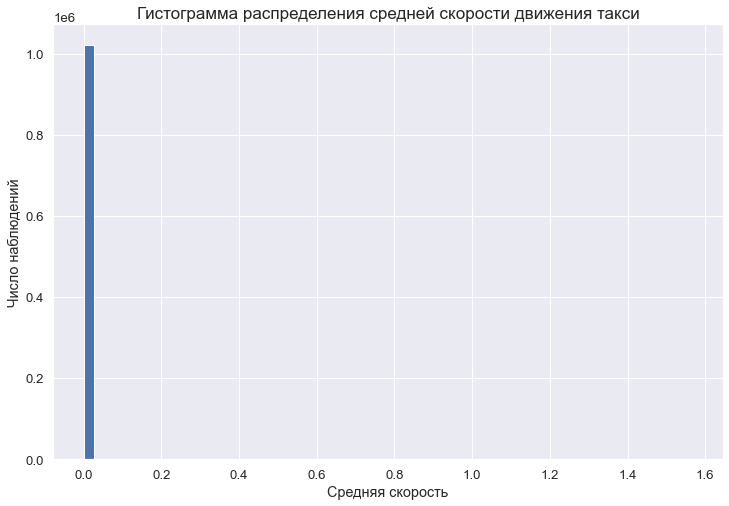

In [29]:
avg = train['haversine'] / (np.exp(train['log_trip_duration']) - 1)

plt.figure(figsize = (12, 8))
plt.hist(avg, bins = 60)
plt.title('Гистограмма распределения средней скорости движения такси', fontsize = 17)
plt.xlabel('Средняя скорость')
plt.ylabel('Число наблюдений')
;

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

''

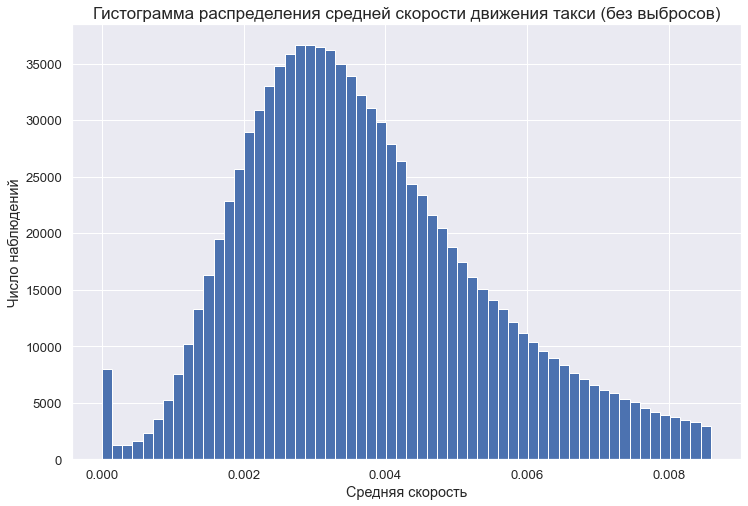

In [30]:
# будем использовать интерквартильный размах для определения выбросов
avg_q3 = avg.quantile(0.75)
iqr = avg.quantile(0.75) - avg.quantile(0.25)
lim = avg_q3 + 1.5 * iqr

plt.figure(figsize = (12, 8))
plt.hist(avg[avg < lim], bins = 60)
plt.title('Гистограмма распределения средней скорости движения такси (без выбросов)', fontsize = 17)
plt.xlabel('Средняя скорость')
plt.ylabel('Число наблюдений')
;

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

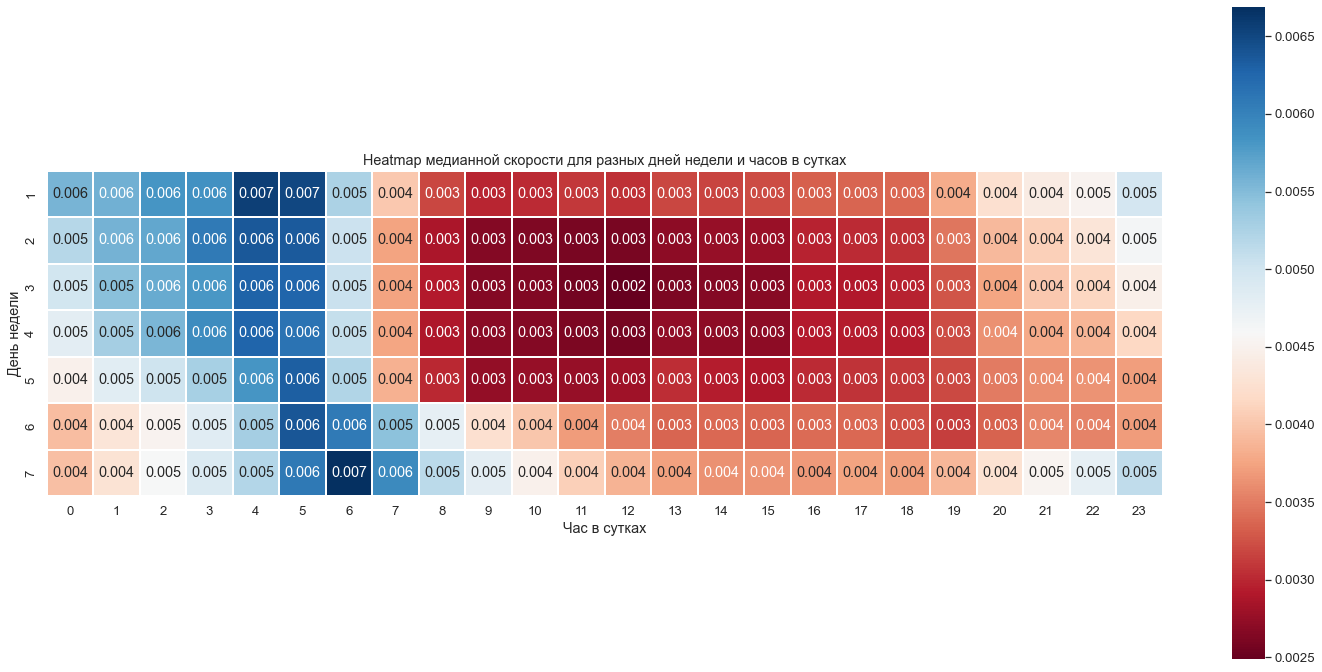

In [31]:
train['avg_speed'] = avg
gr = train.groupby([train['pickup_datetime'].dt.isocalendar().day, 
                 train['pickup_datetime'].dt.hour])['avg_speed'].median().reset_index() # сделали датасет из групбая
matrix = gr.pivot('day', 'pickup_datetime', 'avg_speed') # сделали из него матрицу

# теперь рисуем heatmap
plt.figure(figsize = (25, 12))

sns.heatmap(matrix, 
            square=True, annot=True, fmt=".3f", 
            linewidths=0.1, cmap="RdBu").set(
            title = 'Heatmap медианной скорости для разных дней недели и часов в сутках', 
            xlabel = 'Час в сутках', ylabel = 'День недели');

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому что мы использовали таргет для нахождения скорости (поделив расстояние на время). Поэтому при предсказании модели не будут нужны никакие признаки кроме как расстояние и скорость, и из них она будет точно находить таргет. Грубо говоря, мы просто дали модели правильные ответы, а потом хотим, чтобы она делала предсказания. Так сказать, произошел data leak.

In [32]:
train.drop(columns = 'avg_speed', inplace = True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [33]:
# возвращаем численный формат для этих переменных
df[['day', 'month', 'hour', 'day_of_year']] = df[['day', 'month', 'hour', 'day_of_year']].astype(int)

Для каждого дня недели из картинки можно найти периоды с минимальной и максимальной скоростью:

In [34]:
df['is_traffic'] = np.zeros(len(df)) # создаем переменные для трафика и свободных дорог
df['is_free'] = np.zeros(len(df)) 

# смотрим на периоды с максимальной скоростью по таблице и заполняем переменную для свободных дорог
df.loc[(df['day'] == 1) & (df['hour'].isin(np.arange(4, 6))), 'is_free'] = 1
df.loc[(df['day'] == 2) & (df['hour'].isin(np.arange(1, 6))), 'is_free'] = 1
df.loc[(df['day'] == 3) & (df['hour'].isin(np.arange(2, 6))), 'is_free'] = 1
df.loc[(df['day'] == 4) & (df['hour'].isin(np.arange(2, 6))), 'is_free'] = 1
df.loc[(df['day'] == 5) & (df['hour'].isin(np.arange(4, 6))), 'is_free'] = 1
df.loc[(df['day'] == 6) & (df['hour'].isin(np.arange(5, 7))), 'is_free'] = 1
df.loc[(df['day'] == 7) & (df['hour'].isin(np.arange(5, 8))), 'is_free'] = 1

# то же самое для пробок
df.loc[(df['day'] == 1) & (df['hour'].isin(np.arange(8, 19))), 'is_traffic'] = 1
df.loc[(df['day'] == 2) & (df['hour'].isin(np.arange(8, 20))), 'is_traffic'] = 1
df.loc[(df['day'] == 3) & (df['hour'].isin(np.arange(8, 20))), 'is_traffic'] = 1
df.loc[(df['day'] == 4) & (df['hour'].isin(np.arange(8, 20))), 'is_traffic'] = 1
df.loc[(df['day'] == 5) & (df['hour'].isin(np.arange(8, 21))), 'is_traffic'] = 1
df.loc[(df['day'] == 6) & (df['hour'].isin(np.arange(13, 21))), 'is_traffic'] = 1
df.loc[(df['day'] == 7) & (df['hour'].isin(np.arange(10, 21))), 'is_traffic'] = 1

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Я думаю, что лучше всего будет выбрать в качестве пунктов (среди отмеченных мной выше) два аэропорта и парк. Все-таки Wall Street слишком популярное место и поездки оттуда и туда могут быть слишком разные (как длительные, так и короткие)

Координаты Аэропорт Ла-Гуардия: (40.775, -73.87)

Координаты Аэорпорт Дж.Ф. Кеннеди: (40.64, -73.78)

Координаты Battery Parking Garage: (40.7059225, -74.0140012)

In [35]:
df['start_laguardia'] = np.zeros(len(df))
df['stop_laguardia'] = np.zeros(len(df))
df['start_JFK'] = np.zeros(len(df))
df['stop_JFK'] = np.zeros(len(df))
df['start_park'] = np.zeros(len(df))
df['stop_park'] = np.zeros(len(df))

In [36]:
df.loc[(df['pickup_latitude'] >= 40.775 - 0.02) & (df['pickup_latitude'] <= 40.775 + 0.02) & 
(df['pickup_longitude'] >= -73.87 - 0.02) & (df['pickup_longitude'] <= -73.87 + 0.02), 'start_laguardia'] = 1
df.loc[(df['dropoff_latitude'] >= 40.775 - 0.02) & (df['dropoff_latitude'] <= 40.775 + 0.02) & 
(df['dropoff_longitude'] >= -73.87 - 0.02) & (df['dropoff_longitude'] <= -73.87 + 0.02), 'stop_laguardia'] = 1

df.loc[(df['pickup_latitude'] >= 40.64 - 0.02) & (df['pickup_latitude'] <= 40.64 + 0.02) & 
(df['pickup_longitude'] >= -73.78 - 0.02) & (df['pickup_longitude'] <= -73.78 + 0.02), 'start_JFK'] = 1
df.loc[(df['dropoff_latitude'] >= 40.64 - 0.02) & (df['dropoff_latitude'] <= 40.64 + 0.02) & 
(df['dropoff_longitude'] >= -73.78 - 0.02) & (df['dropoff_longitude'] <= -73.78 + 0.02), 'stop_JFK'] = 1

df.loc[(df['pickup_latitude'] >= 40.7059225 - 0.005) & (df['pickup_latitude'] <= 40.7059225 + 0.005) & 
(df['pickup_longitude'] >= -74.0140012 - 0.005) & (df['pickup_longitude'] <= -74.0140012 + 0.005), 
       'start_park'] = 1
df.loc[(df['dropoff_latitude'] >= 40.7059225 - 0.005) & (df['dropoff_latitude'] <= 40.7059225 + 0.005) & 
(df['dropoff_longitude'] >= -74.0140012 - 0.005) & (df['dropoff_longitude'] <= -74.0140012 + 0.005), 
       'stop_park'] = 1

In [37]:
train, test = train_test_split(df, test_size = 0.3, random_state = 5)

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

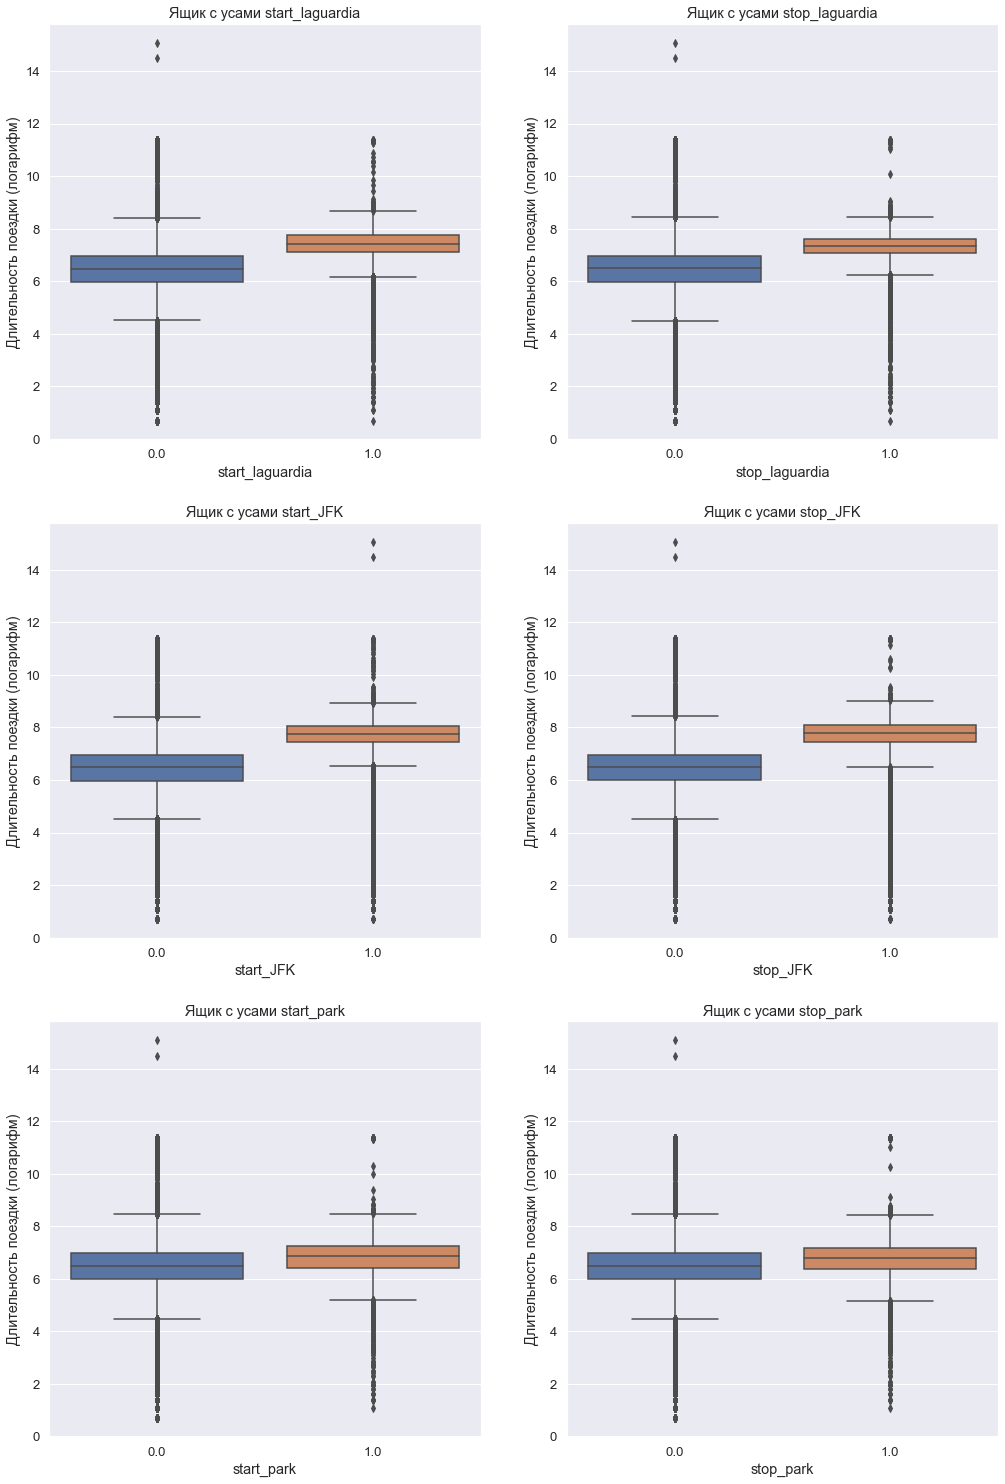

In [38]:
columns = ['start_laguardia', 'stop_laguardia', 'start_JFK', 'stop_JFK', 'start_park', 'stop_park']

fig, axes = plt.subplots(3, 2, figsize=(17,26))
for i in range(len(columns)):
    sns.boxplot(x = train[columns[i]], y = train['log_trip_duration'], ax = axes[i // 2, i % 2]).set(
                 title = 'Ящик с усами ' + columns[i],
                 xlabel = columns[i],
                 ylabel = 'Длительность поездки (логарифм)')
                                                                                

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Мне кажется, что признаки действительно получились хорошими, потому что везде медиана для 1 выше чем для 0 (правда, конечно, для аэропортов разница намного заметнее, но и для парка в принципе можно наблюдать различия)

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows_num, cols_num, columns):
        self.rows = rows_num
        self.cols = cols_num
        
        self.columns = columns
        # здесь будет список из колонок pickup_lat, pickup_long, и т.д. (всего 4), в которых нужные нам координаты
        
    
    def fit(self, X):
        # снова будем использовать IQR для определения границ
        q1 = X[self.columns].quantile(0.25)
        q3 = X[self.columns].quantile(0.75)
        iqr = q3 - q1
        
        # считаем границы коробки для pickup и dropoff
        left_pickup, left_dropoff = q1[[1, 3]] - 1.5 * iqr[[1, 3]]
        right_pickup, right_dropoff = q3[[1, 3]] + 1.5 * iqr[[1, 3]]
        up_pickup, up_dropoff = q3[[0, 2]] + 1.5 * iqr[[0, 2]]
        down_pickup, down_dropoff = q1[[0, 2]] - 1.5 * iqr[[0, 2]]
        
        # чтобы коробка была одна посчитаем среднее из границ pickup и dropoff
        self.left = (left_pickup + left_dropoff) / 2
        self.right = (right_pickup + right_dropoff) / 2
        self.up = (up_pickup + up_dropoff) / 2
        self.down = (down_pickup + down_dropoff) / 2
        
        # еще нам нужна длина ячейки (горизонтальная и вертикальная)
        self.step_hor = (self.right - self.left) / self.cols
        self.step_ver = (self.up - self.down) / self.rows
        
        # все, наш фит готов
        return self

    def transform(self, X):
        X['start'] = [0] * len(X)
        X['stop'] = [0] * len(X) # сюда будут записываться ответы
        
        # отмечаем координаты, которые вывалились за пределы
        mask_out_start = ((X[self.columns[0]] < self.down) | (X[self.columns[0]] > self.up) |
                         (X[self.columns[1]] < self.left) | (X[self.columns[1]] > self.right))
        mask_out_stop = ((X[self.columns[2]] < self.down) | (X[self.columns[2]] > self.up) |
                        (X[self.columns[3]] < self.left) | (X[self.columns[3]] > self.right))
            
        # сначала записываем в название ячейки ее отклонение (в терминах длины шага) снизу по вертикали 
        X.loc[~mask_out_start, 'start'] = np.floor((X.loc[~mask_out_start, self.columns[0]] - self.down) / 
                                                   self.step_ver)
        X.loc[~mask_out_stop, 'stop'] = np.floor((X.loc[~mask_out_stop, self.columns[2]] - self.down) / 
                                                 self.step_ver)
        
        
        # теперь добавляем к ним отклонение снизу по вертикали, но умноженное на число строк,
        # чтобы названия ячеек были разными
        X.loc[~mask_out_start, 'start'] += np.floor((X.loc[~mask_out_start, self.columns[1]] - self.left) / 
                                                   self.step_hor) * self.rows
        X.loc[~mask_out_stop, 'stop'] += np.floor((X.loc[~mask_out_stop, self.columns[3]] - self.left) / 
                                                 self.step_hor) * self.rows
        
        # ну и тем координатам, которые за пределами присваиваем -1
        X.loc[mask_out_start, 'start'] = -1
        X.loc[mask_out_stop, 'stop'] = -1
        
        # дропать columns я не хочу, может координаты еще пригодятся
        
        return X

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [40]:
columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
variables = ['log_haversine', 'start_laguardia', 'stop_laguardia', 'is_traffic', 'is_free',
             'start_JFK', 'stop_JFK', 'start_park', 'stop_park'] + features
cats = ['day', 'month', 'hour', 'day_of_year', 'start', 'stop']

X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

scaller = StandardScaler()
X_train['log_haversine'] = scaller.fit_transform(np.array(X_train['log_haversine']).reshape(-1, 1))
X_test['log_haversine'] = scaller.transform(np.array(X_test['log_haversine']).reshape(-1, 1))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

# может прогружаться 2-3 секунды

In [41]:
model_l2 = Ridge()
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l2)}')
# грузится секунд 10

RMSLE на тестовой выборке: 0.4752238190141839


Качество стало сильно лучше

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [42]:
train['vendor_id'].value_counts()

2    546550
1    474500
Name: vendor_id, dtype: int64

Признак vendor_id - это, как я понял, айдишник компании такси. Видимо, в выборке у нас информация о перевозках в двух таксишных компаниях (типа uber и яндекс). Признак может быть полезен тем, что у каждой компании есть свои особенности (низкие/высокие цены, доступность автомобилей разных категорий, возможность совершения длительных поездок и т.д.). Все это, конечно может пригодиться в предсказании

In [43]:
train['passenger_count'].value_counts()

1    723842
2    147011
5     54703
3     41819
6     33736
4     19889
0        45
7         3
8         1
9         1
Name: passenger_count, dtype: int64

Следующий признак - passenger_count. Очевидно, это число пассажиров в поездке. Этот признак может быть полезен тем, что длительные поездки часто совершаются всей семьей или большой компанией (т.е. в такой поездке может быть много пассажиров)

In [44]:
train['store_and_fwd_flag'].value_counts()

N    1015447
Y       5603
Name: store_and_fwd_flag, dtype: int64

Последний признак - store_and_fwd_flag. Он указывает на то, сохранилась ли поездка в памяти при разрыве соединения с сервером. Я бы сказал, что это наименее полезный признак из представленных, но может быть в долгих поездках повышается шанс разрыва соединения и это как-то пригодится в предсказании

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

''

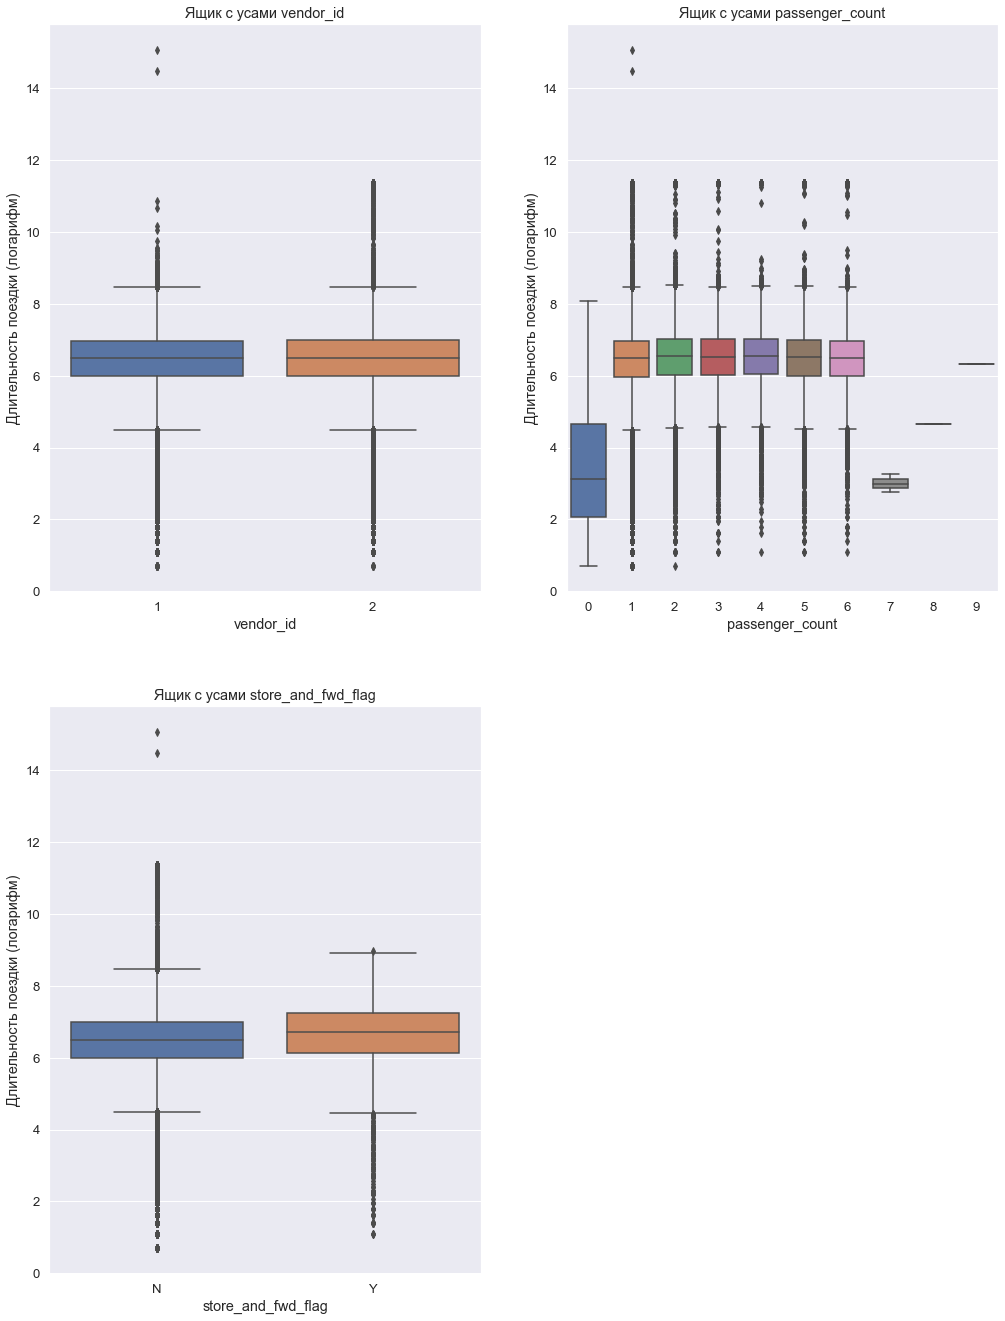

In [45]:
cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

fig, axes = plt.subplots(2, 2, figsize=(17,23))
for i in range(len(cols)):
    sns.boxplot(x = train[cols[i]], y = train['log_trip_duration'], ax = axes[i // 2, i % 2]).set(
                 title = 'Ящик с усами ' + cols[i],
                 xlabel = cols[i],
                 ylabel = 'Длительность поездки (логарифм)')
axes[1, 1].axis('off')
;

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [46]:
# беру за основной класс(единичку) классы с меньшим числом наблюдений, хотя скорее нет особой разницы
df['vendor_id'] = (df['vendor_id'] == 1) * 1
df['store_and_fwd_flag'] = (df['store_and_fwd_flag'] == 'Y') * 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Для переменной vendor_id распределение длительности поездки практически идентичное, вряд ли этот признак можно назвать сильным, но возможно он хорошо сработает в паре с каким нибудь другим. По переменной passenger_count выделяются классы с небольшим количеством наблюдений (0, 7, 8, 9 пассажиров), остальные же в основном похожи друг на друга, поэтому тоже не очень сильный признак. А вот по признаку store_and_fwd_flag можно наблюдать небольшую разницу: медиана длительности для тех поездок, где обрубалась связь чуть повыше чем для остальных. Как оказалось, это наверное наиболее сильный признак из представленных (хотя думал я наоборот)

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

Объединим классы со слишком маленьким числом наблюдений в один:

In [47]:
df.loc[df['passenger_count'].isin([0, 7, 8, 9]), 'passenger_count'] = 'other'

In [48]:
train, test = train_test_split(df, test_size = 0.3, random_state = 5)
columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
variables = ['log_haversine', 'start_laguardia', 'stop_laguardia', 'is_traffic', 'is_free',
             'start_JFK', 'stop_JFK', 'start_park', 'stop_park', 'vendor_id', 'store_and_fwd_flag'] + features
cats = ['day', 'month', 'hour', 'day_of_year', 'start', 'stop', 'passenger_count']

X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

scaller = StandardScaler()
X_train['log_haversine'] = scaller.fit_transform(np.array(X_train['log_haversine']).reshape(-1, 1))
X_test['log_haversine'] = scaller.transform(np.array(X_test['log_haversine']).reshape(-1, 1))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

# может прогружаться 2-3 секунды

In [49]:
model_l2 = Ridge()
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l2)}')
# грузится секунд 10

RMSLE на тестовой выборке: 0.47479981696779483


Да, как я и думал качество улучшилось совсем на чуть-чуть

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Все-таки улучшение было, поэтому я оставлю

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [50]:
import gc
gc.collect()

20476

''

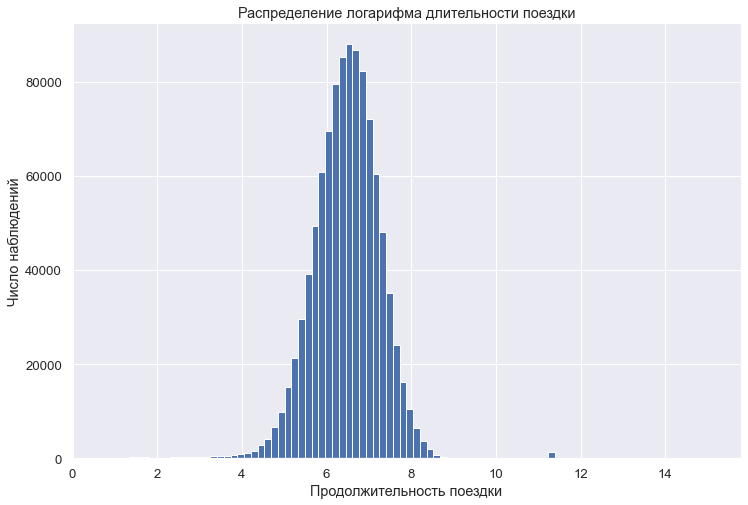

In [51]:
plt.figure(figsize = (12, 8))

plt.hist(train['log_trip_duration'], bins = 90)
plt.title('Распределение логарифма длительности поездки')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Число наблюдений')
;

Для этой переменной выбросы я бы определил на глазок. Можно откинуть все, что больше 9 и меньше 3.5:

In [52]:
train = train[(train['log_trip_duration'] <= 9) & (train['log_trip_duration'] >= 3.5)]

''

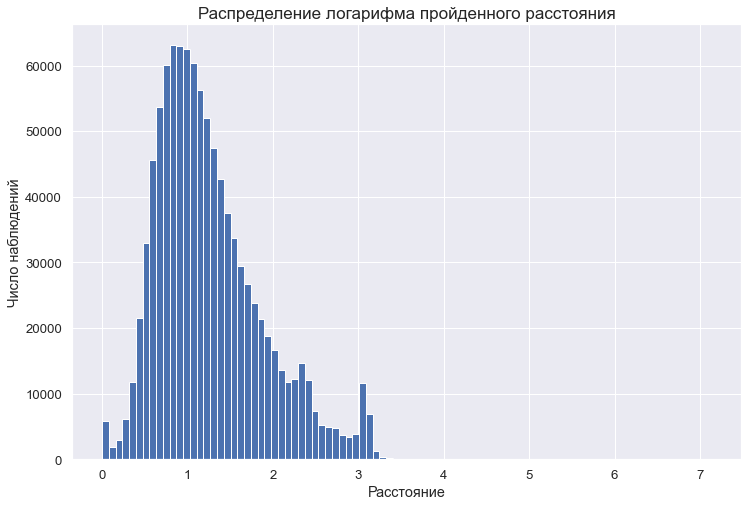

In [53]:
plt.figure(figsize = (12, 8))

plt.hist(train['log_haversine'], bins = 90)
plt.title('Распределение логарифма пройденного расстояния', fontsize = 17)
plt.xlabel('Расстояние')
plt.ylabel('Число наблюдений')
;

Снова выбросы можно заметить по графику: уберем наблюдения с нулевым расстоянием и те, где расстояние больше 3.25:

In [54]:
train = train[(train['log_haversine'] <= 3.25) & (train['log_haversine'] > 0)]

''

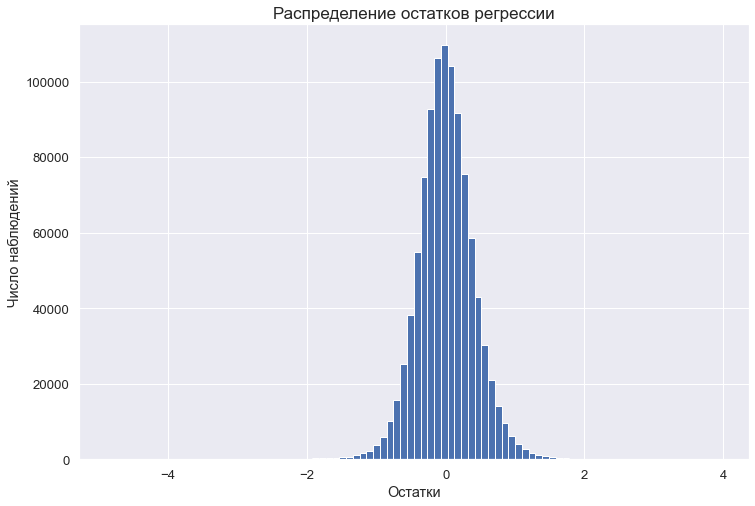

In [55]:
# снова обучаем модель, чтобы получить остатки регрессии на трейне
X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

scaller = StandardScaler()
X_train['log_haversine'] = scaller.fit_transform(np.array(X_train['log_haversine']).reshape(-1, 1))
X_test['log_haversine'] = scaller.transform(np.array(X_test['log_haversine']).reshape(-1, 1))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

model_l2 = Ridge()
model_l2.fit(X_train, y_train)
y_pred_train = model_l2.predict(X_train)
res = y_pred_train - train['log_trip_duration']

plt.figure(figsize = (12, 8))

plt.hist(res, bins = 90)
plt.title('Распределение остатков регрессии', fontsize = 17)
plt.xlabel('Остатки')
plt.ylabel('Число наблюдений')
;

Тут на самом деле практически нечего убирать. Если отбросить все, что больше 2 и меньше -2, то мы не уберем даже 0.1%

In [56]:
((res >= -2) & (res <= 2)).mean()

0.9990719307990488

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

Я посмотрел на value_counts по всем категориальным признакам, вроде везде классы представлены нормально. Маленькие классы были только у признака passenger_count, и их я объединял выше

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

Мы ее уже обучили выше, когда искали остатки регрессии. Считаем прогноз и качество:

In [57]:
y_pred = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred)}')

RMSLE на тестовой выборке: 0.47582124760577166


Как и ожидалось, качество действительно упало

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [58]:
X_train = train.drop(columns = 'log_trip_duration')

transformer = MapGridTransformer(4, 3, columns = columns) 
transformer.fit(X_train)
X_train = transformer.transform(X_train)
print(f'Число признаков до кодирования: {len(X_train[variables + cats].columns)}')

X_train[cats] = X_train[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
print(f'Число признаков после кодирования: {len(X_train.columns)}')

Число признаков до кодирования: 24
Число признаков после кодирования: 474


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [59]:
X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

scaller = StandardScaler()
X_train['log_haversine'] = scaller.fit_transform(np.array(X_train['log_haversine']).reshape(-1, 1))
X_test['log_haversine'] = scaller.transform(np.array(X_test['log_haversine']).reshape(-1, 1))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)


In [60]:
from sklearn.linear_model import Lasso
model_l1 = Lasso()
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l1)}')

RMSLE на тестовой выборке: 0.7955346764416933


Ошибка сильно выросла, получается, что метод Ridge намного лучше для этой задачи

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [61]:
train_new, train_val = train_test_split(train, test_size = 0.2, random_state = 22)
X_train = train_new.drop(columns = 'log_trip_duration')
X_test = train_val.drop(columns = 'log_trip_duration')
y_train = train_new['log_trip_duration']
y_test = train_val['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

scaller = StandardScaler()
X_train['log_haversine'] = scaller.fit_transform(np.array(X_train['log_haversine']).reshape(-1, 1))
X_test['log_haversine'] = scaller.transform(np.array(X_test['log_haversine']).reshape(-1, 1))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

In [62]:
alphas = np.logspace(-2, 3, 20)
error_ridge = []
error_lasso = []
coefs_zero = [] # нужно для следующего пункта
for alpha in alphas:
    #Ridge
    model_l2 = Ridge(alpha = alpha)
    model_l2.fit(X_train, y_train)
    pred = model_l2.predict(X_test)
    error_ridge.append(rmsle(y_test, pred))
    
    #Lasso
    model_l1 = Lasso(alpha = alpha)
    model_l1.fit(X_train, y_train)
    pred = model_l2.predict(X_test)
    error_lasso.append(rmsle(y_test, pred))
    coefs_zero.append(sum(model_l1.coef_ == 0))
# очень долго грузится

In [63]:
min_error_ridge = min(error_ridge)
for i in range(20):
    if error_ridge[i] == min_error_ridge:
        best_alpha_ridge = alphas[i]
        
min_error_lasso = min(error_lasso)
for i in range(20):
    if error_lasso[i] == min_error_lasso:
        best_alpha_lasso = alphas[i]
        
print(f'best alpha Ridge: {best_alpha_ridge}')
print(f'best alpha Lasso: {best_alpha_lasso}')

best alpha Ridge: 0.01
best alpha Lasso: 0.01


Сохраните наилучшее значение, как бенчмарк на будущее

In [64]:
X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

scaller = StandardScaler()
X_train['log_haversine'] = scaller.fit_transform(np.array(X_train['log_haversine']).reshape(-1, 1))
X_test['log_haversine'] = scaller.transform(np.array(X_test['log_haversine']).reshape(-1, 1))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

In [66]:
# Lasso нет смысла оценивать, оно показывает себя сильно хуже
model_l2 = Ridge(alpha = best_alpha_ridge)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l2)}')

RMSLE на тестовой выборке: 0.4766404444625444


In [67]:
best_rmsle = rmsle(y_test, y_pred_l2)

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

''

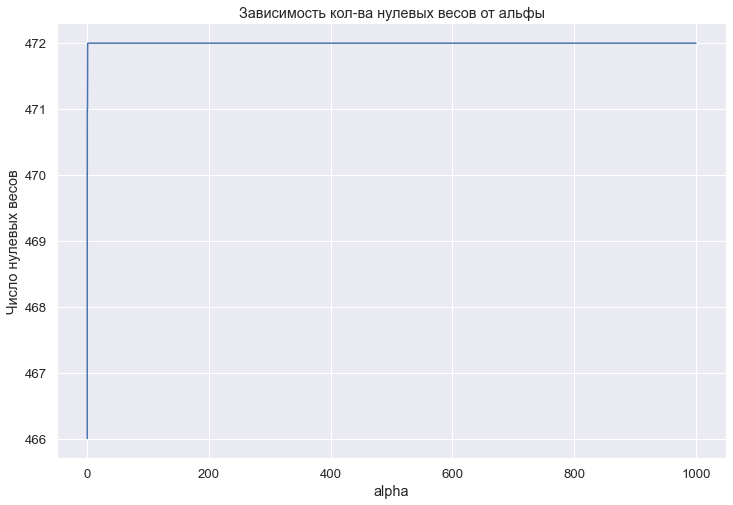

In [68]:
plt.figure(figsize = (12, 8))
plt.plot(alphas, coefs_zero)
plt.title('Зависимость кол-ва нулевых весов от альфы')
plt.xlabel('alpha')
plt.ylabel('Число нулевых весов')
;

Возможно, я что-то делаю не так, но модель зануляет все веса. Выбрав модель с lasso-регуляризацией мы в любом случае потеряем в качестве, поэтому не думаю, что есть смысл ее дальше рассматривать

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Наверное, потому что модель смотрит на взаимосвязь именно с таргетом, а не между самими признаками, и поэтому не может вытащить эту информацию

In [69]:
X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

У нас есть классы с маленьким числом наблюдений (будет видно если посмотреть value_counts), надо бы это исправить. Отнесем их к -1:

In [70]:
X_train.loc[X_train['start'] == 12, 'start'] = -1
X_train.loc[X_train['stop'].isin([12, 3]), 'stop'] = -1
X_test.loc[X_test['start'] == 3, 'start'] = -1
X_test.loc[X_test['stop'].isin([12, 3]), 'stop'] = -1

In [71]:
pair_counts = X_train.groupby(['start', 'stop']).size().reset_index(name='count')
top_pairs = pair_counts.nlargest(100, 'count')
pair_to_code = {tuple(row[:2]): idx for idx, row in enumerate(top_pairs.itertuples(index=False), start=0)}
def encode_pair(row):
    return pair_to_code.get((row['start'], row['stop']), -1)

X_train['encoded'] = X_train.apply(encode_pair, axis=1)

Тут я согрешил и нагло скопировал код у chat gpt. Вот мой промпт: "в датасете у меня есть колонка с локацией откуда началась поездка (может принимать значения от 1 до 9) и колонка с локацией где завершилась поездка (принимает такие же значения) для каждой пары этих значений нужно посчитать сколько раз они встречались и отобрать 100 наиболее популярных и закодировать их а остальным присвоить значение -1"

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [72]:
# объединяем все из прошлого пункта + проделываем то же самое для теста, поэтому огромная ячейка и грузится долго
columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
variables = ['log_haversine', 'start_laguardia', 'stop_laguardia', 'is_traffic', 'is_free',
             'start_JFK', 'stop_JFK', 'start_park', 'stop_park', 'vendor_id', 'store_and_fwd_flag'] + features
cats = ['day', 'month', 'hour', 'day_of_year', 'start', 'stop', 'passenger_count', 'encoded']

X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

X_train.loc[X_train['start'] == 12, 'start'] = -1
X_train.loc[X_train['stop'].isin([12, 3]), 'stop'] = -1
X_test.loc[X_test['start'] == 3, 'start'] = -1
X_test.loc[X_test['stop'].isin([12, 3]), 'stop'] = -1

pair_counts = X_train.groupby(['start', 'stop']).size().reset_index(name='count')
top_pairs = pair_counts.nlargest(100, 'count')
pair_to_code = {tuple(row[:2]): idx for idx, row in enumerate(top_pairs.itertuples(index=False), start=0)}
def encode_pair(row):
    return pair_to_code.get((row['start'], row['stop']), -1)
X_train['encoded'] = X_train.apply(encode_pair, axis=1)

pair_counts = X_test.groupby(['start', 'stop']).size().reset_index(name='count')
top_pairs = pair_counts.nlargest(100, 'count')
pair_to_code = {tuple(row[:2]): idx for idx, row in enumerate(top_pairs.itertuples(index=False), start=0)}
def encode_pair(row):
    return pair_to_code.get((row['start'], row['stop']), -1)
X_test['encoded'] = X_test.apply(encode_pair, axis=1)

scaller = StandardScaler()
X_train['log_haversine'] = scaller.fit_transform(np.array(X_train['log_haversine']).reshape(-1, 1))
X_test['log_haversine'] = scaller.transform(np.array(X_test['log_haversine']).reshape(-1, 1))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

In [73]:
model_l2 = Ridge()
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l2)}')

RMSLE на тестовой выборке: 0.48463687336173816


Качество только ухудшилось :( Но я примерно знаю, что можно делать, чтобы его улучшить

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Манхэттенское расстояние - это такая метрика, которая считает не кратчайшее расстояние между двумя точками а как бы расстояние под прямым углом. Вроде как считается по формуле через модули, а не корень из квадратов как обычно. Получила такое название вроде как в честь улиц манхэттена, которые в виде кварталов расположены перпендикулярно друг другу

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [74]:
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b                                 # функцию взял из семинара
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, 
                 train['pickup_longitude'].values, train['dropoff_latitude'].values, 
                                                   train['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(test['pickup_latitude'].values, 
                 test['pickup_longitude'].values, test['dropoff_latitude'].values, 
                                                   test['dropoff_longitude'].values)
train['log_manhattan'] = np.log1p(train['distance_dummy_manhattan'])
test['log_manhattan'] = np.log1p(test['distance_dummy_manhattan'])

corr_simple = train['log_haversine'].corr(train['log_trip_duration'])
corr_manh = train['log_manhattan'].corr(train['log_trip_duration'])
corr_simple_manh = train['log_manhattan'].corr(train['log_haversine'])
print(f'Корреляция между логарифмом обычного расстояния и таргета: {corr_simple}')
print(f'Корреляция между логарифмом манхэттенского расстояния и таргета: {corr_manh}')
print(f'Корреляция между логарифмом обычного и манхэттенского расстояний: {corr_simple_manh}')

Корреляция между логарифмом обычного расстояния и таргета: 0.7811085810197502
Корреляция между логарифмом манхэттенского расстояния и таргета: 0.7741470341643601
Корреляция между логарифмом обычного и манхэттенского расстояний: 0.9943787370378735


Очевидно, корреляция между двумя переменными очень большая, так как одна используется при подсчете другой, да и в целом они обе описывают расстояние. Корреляция с таргетом у обычного расстояния все-таки побольше. Непонятно, почему так происходит, возможно манхэттенская метрика все-таки не везде подходит, ведь у нас есть много наблюдений за городом с обычными дорогами

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [75]:
columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
variables = ['log_haversine', 'start_laguardia', 'stop_laguardia', 'is_traffic', 'is_free', 'log_manhattan',
             'start_JFK', 'stop_JFK', 'start_park', 'stop_park', 'vendor_id', 'store_and_fwd_flag'] + features
cats = ['day', 'month', 'hour', 'day_of_year', 'start', 'stop', 'passenger_count']

X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(4, 3, columns = columns) # сделаем разбиение как на картинке (4х3)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

X_train.loc[X_train['start'].isin([12, 3]),  'start'] = -1
X_train.loc[X_train['stop'].isin([12, 3]), 'stop'] = -1
X_test.loc[X_test['start'].isin([12, 3]), 'start'] = -1
X_test.loc[X_test['stop'].isin([12, 3]), 'stop'] = -1

scaller = StandardScaler()
X_train[['log_haversine', 'log_manhattan']] = scaller.fit_transform(np.array(X_train[['log_haversine', 'log_manhattan']]))
X_test[['log_haversine', 'log_manhattan']] = scaller.transform(np.array(X_test[['log_haversine', 'log_manhattan']]))

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

In [76]:
model_l2 = Ridge()
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l2)}')

RMSLE на тестовой выборке: 0.4749063386336159


In [77]:
best_rmsle

0.4766404444625444

Удивительно, но качество по сравнению с best_rmsle улучшилось

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

Для начала я хочу убрать из рассмотрения признак day_of_year. Он занимает слишком много места, создает кучу категорий и просто меня бесит. Также немного покрутив параметры для нашего трансформера, я понял, что лучшее разбиение - это 7 на 3. Еще я решил убрать признак, который отвечал за точку рядом с парком (все-таки он был слабый), и добавил квадрат и куб расстояния (что очень так хорошо повысило качество). Вроде это не переобучение (надеюсь), потому что на лекции говорилось, что квадраты, кубы - это норм, а вот 15 степени это уже слишком

In [123]:
train['haversine_sq'] = train['log_haversine'] ** 2
test['haversine_sq'] = test['log_haversine'] ** 2
train['haversine_3'] = train['log_haversine'] ** 3
test['haversine_3'] = test['log_haversine'] ** 3

In [155]:
columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
variables = ['log_haversine', 'start_laguardia', 'haversine_sq', 'haversine_3',
             'stop_laguardia', 'is_traffic', 'is_free', 'log_manhattan', 
             'start_JFK', 'stop_JFK', 'vendor_id', 'store_and_fwd_flag'] + features
cats = ['day', 'month', 'hour', 'start', 'stop', 'passenger_count']

X_train = train.drop(columns = 'log_trip_duration')
X_test = test.drop(columns = 'log_trip_duration')
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

transformer = MapGridTransformer(7, 3, columns = columns) 
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

scaller = StandardScaler()
X_train[['log_haversine', 'log_manhattan', 'haversine_sq', 'haversine_3']]  = scaller.fit_transform(X_train[['log_haversine', 'log_manhattan', 'haversine_sq', 'haversine_3']])
X_test[['log_haversine', 'log_manhattan', 'haversine_sq', 'haversine_3']]  = scaller.transform(X_test[['log_haversine', 'log_manhattan', 'haversine_sq', 'haversine_3']])

X_train[cats] = X_train[cats].astype(str)
X_test[cats] = X_test[cats].astype(str)
X_train = pd.get_dummies(X_train[variables + cats], drop_first = True)
X_test = pd.get_dummies(X_test[variables + cats], drop_first = True)

# костыль, если вдруг у нас окажется неодинаковое число столбцов при кодировании
X_train = X_train[set(X_test.columns) & set(X_train.columns)]
X_test = X_test[set(X_test.columns) & set(X_train.columns)]

In [156]:
model_l2 = Ridge(alpha = best_alpha_ridge)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'RMSLE на тестовой выборке: {rmsle(y_test, y_pred_l2)}')

RMSLE на тестовой выборке: 0.46262403219539033


In [157]:
best_rmsle - 0.46262403219539033

0.014016412267154055

Урааа, вроде как получилось повысить качество, дайте мне бонусы пжпжпжп

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

<img src="https://media.tenor.com/3i_YE51dEI8AAAAM/rage.gif" style="width: 400px">